In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

In [4]:
###########################################################
### Normally distributed variables and the confidence
### intervals around our estimated mean.
### Author: OET
###
### Last update: 
###
###    2024-03-30
###    Added legend to the plots for better illustration 
###    of the sample, mean, sample standard deviation,
###    standard error and CI
###    and the true mean, true standard deviation
############################################################


## Generating normally distributed sample data

norm.rvs() has keyword parameters
- location parameter (center of the distribution, population mean)
- scale parameter (width of the distribution, population standard deviation)


```
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
```



We use here an example motivated by the Albany April daily mean temp climatology (unit5):

- mean=47.7 F
- stddev=8.7 F

In [25]:
n=1000# 30 days * 10 years
m=47.7
s=8.7
x=norm.rvs(loc=m,scale=s,size=n)
ypos=np.zeros(n)
print(60*"=")
print("population true mean and true standard deviation:")
print(60*'-')
print(f" m = {m:.2f}, s = {s:.2f}")
print("sample-based estimated mean and standard deviation:")
print(f"m =  {(np.mean(x)):.2f}, s = {(np.std(x)):.2f}")

population true mean and true standard deviation:
------------------------------------------------------------
 m = 47.70, s = 8.70
sample-based estimated mean and standard deviation:
m =  47.38, s = 8.73


999 0.54,1.96, 0.28


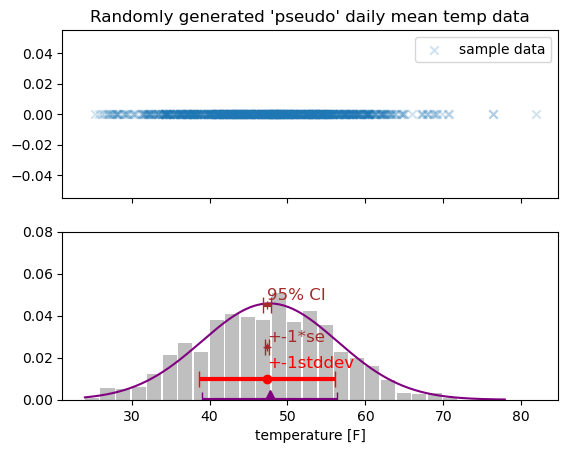

In [36]:
# start a figure with two axes for two graphs
# 2,1 layout is 2 rows, one column arrangement
# on the canvas area
fig,ax=plt.subplots(2,1,sharex=True)

### Top figure shows the random sample
ax[0].scatter(x,ypos,marker='x',label='sample data',alpha=0.2)
ax[0].legend()
ax[0].set_title("Randomly generated 'pseudo' daily mean temp data")

### bottom figure shows the sample-based distribution 
### with help of the histogram plot function
### PDF of the true population is shown for comparison

 
ax[1].hist(x,bins=np.arange(24,78,2),color='gray',alpha=0.5,
           width=1.8,density=True)
ax[1].set_xlabel("temperature [F]")
ax[1].set_ylim(0,0.08)
# 2023-04-13 add more for confidence interval calculations.


# add normal distribution PDF
temp_range=np.arange(24,78,0.1)
pdf=norm.pdf(temp_range,loc=m,scale=s)

ax[1].plot(temp_range,pdf,color='purple',label='True PDF')

# OET todo lookup y-value for -1s from mean to plot the mean and true sinto PDF

#2023-04-13
# add the population mean
ax[1].plot(m,0,'^',markersize=14,color='purple',label='true mean')
ax[1].errorbar(m,0,xerr=s,
               fmt='o', linewidth=3, color='purple',capsize=6)
# add the sample mean
msample=np.mean(x)
sdsample=np.std(x)
ax[1].errorbar(msample,0.01,xerr=sdsample,
               fmt='o', linewidth=3, color='red',capsize=6)

ax[1].text(msample,0.015, '+-1stddev',color='red',
           fontsize=12)
# add standard error of the mean
n=len(x)
sesample=sdsample/np.sqrt(n)
ax[1].errorbar(msample,0.025,xerr=sesample,
               fmt='+', linewidth=3, color='brown',capsize=6)
ax[1].text(msample,0.0275, '+-1*se',color='brown',
           fontsize=12)
# add the confidence intervals
df=n-1
t95=t.interval(0.95,df)
t95=t95[1] # only the positive value
CI=t95*sesample
print(f"{df} {CI:.2f},{t95:.2f}, {sesample:.2f}")


sesample=sdsample/np.sqrt(n)
ax[1].errorbar(msample,0.045,xerr=CI,
               fmt='+', linewidth=3, color='brown',capsize=6)
ax[1].text(msample,0.0475, '95% CI',color='brown',
           fontsize=12)
fig.show()


In [ ]:
### (20230-04-10) Illustration: 95% confidence interval around the calculated mean


In [ ]:
# sample size 30
n=30
m=27.0 # true mean
s=11.0
icount=0
print("calculated mean and lower and upper conf range" )
kmax=1000
for k in range(kmax):
    x=norm.rvs(loc=m,scale=s,size=n)
    mcalc=x.mean()
    df=n-1
    se=x.std()/np.sqrt(n)
    t95= t.interval(0.95,df)
    
    print(f"mcalc={mcalc:.3f} {(t95[0]*se+mcalc):.3f} - {(t95[1]*se+mcalc):.3f}")
    lower=(t95[0]*se+mcalc)
    upper=(t95[1]*se+mcalc)
    if (lower<m<upper):
        icount+=1
    else:
        print("true mean not in 95%CI")
print("percent of true mean inside 95%CI")
print(icount/kmax*100)



In [ ]:
print(t95)
print(type(t95))

In [ ]:
t95[1]
